In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv('train_file.csv')
test=pd.read_csv('test_file.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55399 entries, 0 to 55398
Data columns (total 17 columns):
Patient_ID                  55399 non-null int64
YEAR                        55399 non-null int64
LocationDesc                55399 non-null object
Subtopic                    55399 non-null int64
Greater_Risk_Question       55399 non-null object
Description                 55399 non-null object
Sample_Size                 55399 non-null float64
Sex                         55399 non-null object
Race                        55399 non-null object
Grade                       55399 non-null int64
GeoLocation                 52098 non-null object
QuestionCode                55399 non-null object
StratID1                    55399 non-null int64
StratID2                    55399 non-null int64
StratID3                    55399 non-null int64
StratificationType          55399 non-null object
Greater_Risk_Probability    55399 non-null float64
dtypes: float64(2), int64(7), object(8)
memory

In [4]:
train.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [5]:
train.nunique()

Patient_ID                  55399
YEAR                           14
LocationDesc                   91
Subtopic                        2
Greater_Risk_Question          20
Description                    20
Sample_Size                  3583
Sex                             3
Race                            8
Grade                           5
GeoLocation                    85
QuestionCode                   20
StratID1                        3
StratID2                        8
StratID3                        5
StratificationType              5
Greater_Risk_Probability    51821
dtype: int64

In [6]:
train.dtypes

Patient_ID                    int64
YEAR                          int64
LocationDesc                 object
Subtopic                      int64
Greater_Risk_Question        object
Description                  object
Sample_Size                 float64
Sex                          object
Race                         object
Grade                         int64
GeoLocation                  object
QuestionCode                 object
StratID1                      int64
StratID2                      int64
StratID3                      int64
StratificationType           object
Greater_Risk_Probability    float64
dtype: object

In [7]:
train.isnull().sum()

Patient_ID                     0
YEAR                           0
LocationDesc                   0
Subtopic                       0
Greater_Risk_Question          0
Description                    0
Sample_Size                    0
Sex                            0
Race                           0
Grade                          0
GeoLocation                 3301
QuestionCode                   0
StratID1                       0
StratID2                       0
StratID3                       0
StratificationType             0
Greater_Risk_Probability       0
dtype: int64

In [8]:
train['Greater_Risk_Question'].value_counts()

Currently used marijuana                                                                                                     4421
Had their first drink of alcohol before age 13 years                                                                         4265
Tried marijuana for the first time before age 13 years                                                                       4247
Currently drank alcohol                                                                                                      4204
Ever used cocaine                                                                                                            4072
Were offered, sold, or given an illegal drug on school property                                                              3894
Ever used marijuana                                                                                                          3734
Ever injected any illegal drug                                                            

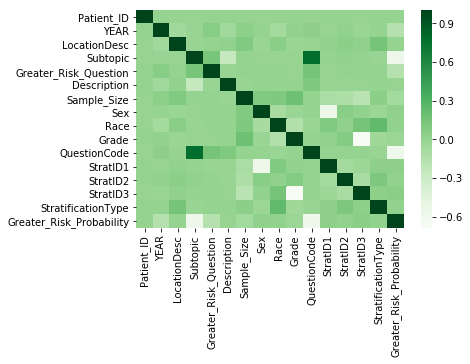

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.heatmap(train.corr(),cmap='Greens')

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["LocationDesc"]=le.fit_transform(train["LocationDesc"])
train["Greater_Risk_Question"]=le.fit_transform(train["Greater_Risk_Question"])
train["Description"]=le.fit_transform(train["Description"])
train["Sex"]=le.fit_transform(train["Sex"])
train["Race"]=le.fit_transform(train["Race"])
train["QuestionCode"]=le.fit_transform(train["QuestionCode"])
train["StratificationType"]=le.fit_transform(train["StratificationType"])

In [24]:
train.isnull().sum()

Patient_ID                     0
YEAR                           0
LocationDesc                   0
Subtopic                       0
Greater_Risk_Question          0
Description                    0
Sample_Size                    0
Sex                            0
Race                           0
Grade                          0
GeoLocation                 3301
QuestionCode                   0
StratID1                       0
StratID2                       0
StratID3                       0
StratificationType             0
Greater_Risk_Probability       0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test["LocationDesc"]=le.fit_transform(test["LocationDesc"])
test["Greater_Risk_Question"]=le.fit_transform(test["Greater_Risk_Question"])
test["Description"]=le.fit_transform(test["Description"])
test["Sex"]=le.fit_transform(test["Sex"])
test["Race"]=le.fit_transform(test["Race"])
test["QuestionCode"]=le.fit_transform(test["QuestionCode"])
test["StratificationType"]=le.fit_transform(test["StratificationType"])

In [23]:
test.isnull().sum()

Patient_ID                  0
YEAR                        0
LocationDesc                0
Subtopic                    0
Greater_Risk_Question       0
Description                 0
Sample_Size                 0
Sex                         0
Race                        0
Grade                       0
GeoLocation              2167
QuestionCode                0
StratID1                    0
StratID2                    0
StratID3                    0
StratificationType          0
dtype: int64

In [14]:
train.dtypes

Patient_ID                    int64
YEAR                          int64
LocationDesc                  int64
Subtopic                      int64
Greater_Risk_Question         int64
Description                   int64
Sample_Size                 float64
Sex                           int64
Race                          int64
Grade                         int64
GeoLocation                  object
QuestionCode                  int64
StratID1                      int64
StratID2                      int64
StratID3                      int64
StratificationType            int64
Greater_Risk_Probability    float64
dtype: object

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


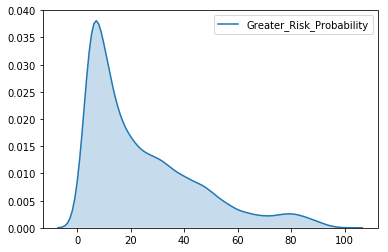

In [17]:
sns.kdeplot(train.Greater_Risk_Probability,shade=True);

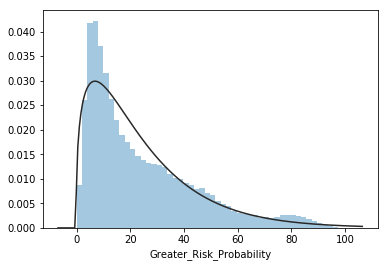

In [20]:
sns.distplot(train.Greater_Risk_Probability,kde=False,fit=stats.gamma);

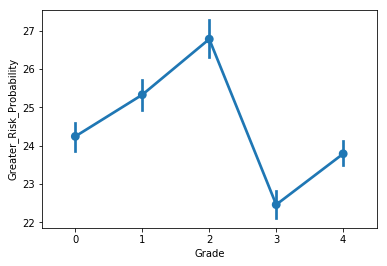

In [21]:
sns.pointplot(x="Grade", y="Greater_Risk_Probability", data=train);

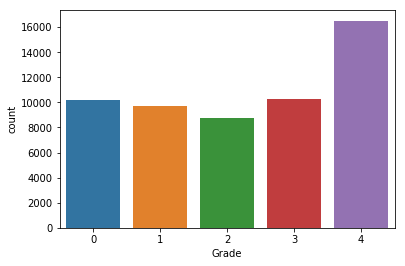

In [22]:
sns.countplot(x='Grade', data=train);

In [23]:
train['Greater_Risk_Probability'].describe()

count    55399.000000
mean        24.365664
std         20.492551
min          0.000000
25%          8.280050
50%         17.555600
75%         35.430750
max         99.449400
Name: Greater_Risk_Probability, dtype: float64

In [3]:
cols_cate = ['YEAR', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sex', 'Race',
       'Grade','StratID1', 'StratID2',
       'StratID3', 'StratificationType']

In [4]:
train1=train[cols_cate]

In [28]:
train1.apply(lambda x :x.value_counts()).T.stack()

YEAR                   1991      720.0
                       1993     1387.0
                       1995     1946.0
                       1997     2393.0
                       1999     2512.0
                       2001     2730.0
                       2003     4127.0
                       2005     5135.0
                       2007     5600.0
                       2009     5371.0
                       2011     5559.0
                       2013     5524.0
                       2015     5621.0
                       2017     6774.0
Subtopic               0       14001.0
                       1       41398.0
Greater_Risk_Question  0        4204.0
                       1        4421.0
                       2        3462.0
                       3        3581.0
                       4         387.0
                       5        3470.0
                       6        4072.0
                       7        2665.0
                       8         102.0
                       9 

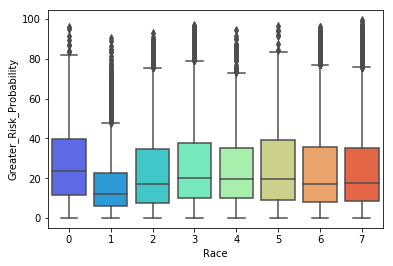

In [42]:
sns.boxplot(x='Race',y='Greater_Risk_Probability',data=train,palette='rainbow')

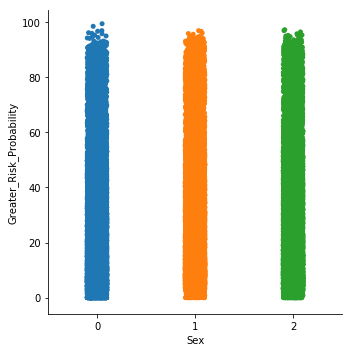

In [45]:
sns.catplot(x='Sex',y='Greater_Risk_Probability',data=train);

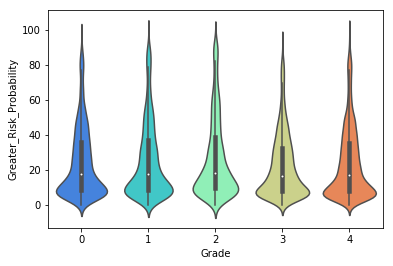

In [48]:
sns.violinplot(x='Grade',y='Greater_Risk_Probability',data=train,palette='rainbow')

In [51]:
t1=train.loc[(train.Greater_Risk_Probability > 40.0)]

In [52]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11305 entries, 1 to 55397
Data columns (total 17 columns):
Patient_ID                  11305 non-null int64
YEAR                        11305 non-null int64
LocationDesc                11305 non-null int64
Subtopic                    11305 non-null int64
Greater_Risk_Question       11305 non-null int64
Description                 11305 non-null int64
Sample_Size                 11305 non-null float64
Sex                         11305 non-null int64
Race                        11305 non-null int64
Grade                       11305 non-null int64
GeoLocation                 10567 non-null object
QuestionCode                11305 non-null int64
StratID1                    11305 non-null int64
StratID2                    11305 non-null int64
StratID3                    11305 non-null int64
StratificationType          11305 non-null int64
Greater_Risk_Probability    11305 non-null float64
dtypes: float64(2), int64(14), object(1)
memory usage

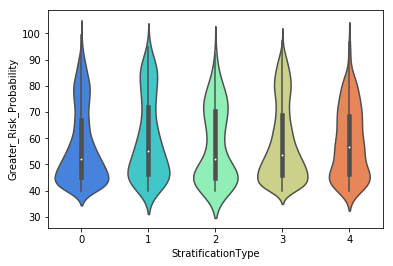

In [57]:
sns.violinplot(x='StratificationType',y='Greater_Risk_Probability',data=t1,palette='rainbow')

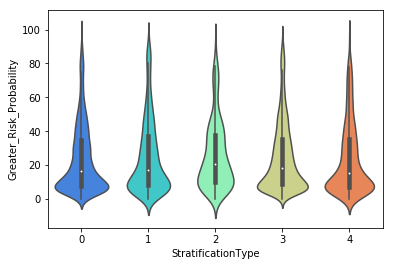

In [58]:
sns.violinplot(x='StratificationType',y='Greater_Risk_Probability',data=train,palette='rainbow')

In [59]:
train.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability'],
      dtype='object')

In [5]:
cols = ['YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType']

In [25]:
X=train[cols]
y=train["Greater_Risk_Probability"]
y_test = test[cols]

In [ ]:
# CatBoost Model 

In [26]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
model.fit(X, y)
y_pre = model.predict(y_test)

0:	learn: 30.9600681	total: 17.9ms	remaining: 17.9s
1:	learn: 30.1157636	total: 26.7ms	remaining: 13.3s
2:	learn: 29.2854001	total: 36.3ms	remaining: 12.1s
3:	learn: 28.4913845	total: 45.6ms	remaining: 11.4s
4:	learn: 27.7209811	total: 55.1ms	remaining: 11s
5:	learn: 26.9685081	total: 64ms	remaining: 10.6s
6:	learn: 26.2451592	total: 73.1ms	remaining: 10.4s
7:	learn: 25.5561746	total: 82.9ms	remaining: 10.3s
8:	learn: 24.8764978	total: 92.2ms	remaining: 10.2s
9:	learn: 24.2271324	total: 102ms	remaining: 10.1s
10:	learn: 23.5930586	total: 111ms	remaining: 9.99s
11:	learn: 22.9771709	total: 120ms	remaining: 9.91s
12:	learn: 22.3803126	total: 134ms	remaining: 10.2s
13:	learn: 21.8091925	total: 149ms	remaining: 10.5s
14:	learn: 21.2616475	total: 163ms	remaining: 10.7s
15:	learn: 20.7276833	total: 176ms	remaining: 10.8s
16:	learn: 20.2118312	total: 191ms	remaining: 11s
17:	learn: 19.7200216	total: 204ms	remaining: 11.1s
18:	learn: 19.2287985	total: 223ms	remaining: 11.5s
19:	learn: 18.76697

174:	learn: 6.4958781	total: 1.83s	remaining: 8.62s
175:	learn: 6.4914359	total: 1.84s	remaining: 8.62s
176:	learn: 6.4852264	total: 1.85s	remaining: 8.62s
177:	learn: 6.4789024	total: 1.86s	remaining: 8.6s
178:	learn: 6.4723880	total: 1.87s	remaining: 8.59s
179:	learn: 6.4695110	total: 1.88s	remaining: 8.56s
180:	learn: 6.4634707	total: 1.89s	remaining: 8.55s
181:	learn: 6.4578272	total: 1.9s	remaining: 8.53s
182:	learn: 6.4479144	total: 1.91s	remaining: 8.51s
183:	learn: 6.4445311	total: 1.92s	remaining: 8.5s
184:	learn: 6.4395701	total: 1.92s	remaining: 8.48s
185:	learn: 6.4335574	total: 1.93s	remaining: 8.46s
186:	learn: 6.4295167	total: 1.94s	remaining: 8.45s
187:	learn: 6.4253482	total: 1.95s	remaining: 8.43s
188:	learn: 6.4166597	total: 1.96s	remaining: 8.41s
189:	learn: 6.4115211	total: 1.97s	remaining: 8.4s
190:	learn: 6.4053584	total: 1.98s	remaining: 8.38s
191:	learn: 6.3986752	total: 1.99s	remaining: 8.37s
192:	learn: 6.3907503	total: 2s	remaining: 8.35s
193:	learn: 6.38390

346:	learn: 5.8115930	total: 3.63s	remaining: 6.83s
347:	learn: 5.8098763	total: 3.64s	remaining: 6.82s
348:	learn: 5.8077846	total: 3.65s	remaining: 6.82s
349:	learn: 5.8058748	total: 3.66s	remaining: 6.8s
350:	learn: 5.8034359	total: 3.67s	remaining: 6.79s
351:	learn: 5.8003775	total: 3.68s	remaining: 6.78s
352:	learn: 5.7971904	total: 3.69s	remaining: 6.76s
353:	learn: 5.7949482	total: 3.7s	remaining: 6.75s
354:	learn: 5.7930485	total: 3.71s	remaining: 6.74s
355:	learn: 5.7902110	total: 3.72s	remaining: 6.72s
356:	learn: 5.7885859	total: 3.73s	remaining: 6.71s
357:	learn: 5.7865414	total: 3.73s	remaining: 6.7s
358:	learn: 5.7849058	total: 3.74s	remaining: 6.68s
359:	learn: 5.7830852	total: 3.75s	remaining: 6.67s
360:	learn: 5.7816103	total: 3.76s	remaining: 6.66s
361:	learn: 5.7796029	total: 3.77s	remaining: 6.64s
362:	learn: 5.7780124	total: 3.78s	remaining: 6.63s
363:	learn: 5.7770109	total: 3.79s	remaining: 6.62s
364:	learn: 5.7718473	total: 3.81s	remaining: 6.62s
365:	learn: 5.7

511:	learn: 5.4911296	total: 5.24s	remaining: 4.99s
512:	learn: 5.4895877	total: 5.25s	remaining: 4.98s
513:	learn: 5.4879156	total: 5.26s	remaining: 4.97s
514:	learn: 5.4869167	total: 5.26s	remaining: 4.96s
515:	learn: 5.4848532	total: 5.27s	remaining: 4.95s
516:	learn: 5.4839199	total: 5.28s	remaining: 4.93s
517:	learn: 5.4825501	total: 5.29s	remaining: 4.92s
518:	learn: 5.4811429	total: 5.3s	remaining: 4.91s
519:	learn: 5.4801724	total: 5.31s	remaining: 4.9s
520:	learn: 5.4789332	total: 5.32s	remaining: 4.89s
521:	learn: 5.4779125	total: 5.33s	remaining: 4.88s
522:	learn: 5.4769539	total: 5.34s	remaining: 4.87s
523:	learn: 5.4759041	total: 5.34s	remaining: 4.86s
524:	learn: 5.4730293	total: 5.35s	remaining: 4.84s
525:	learn: 5.4724002	total: 5.36s	remaining: 4.83s
526:	learn: 5.4710570	total: 5.37s	remaining: 4.82s
527:	learn: 5.4692840	total: 5.38s	remaining: 4.81s
528:	learn: 5.4682693	total: 5.39s	remaining: 4.8s
529:	learn: 5.4667851	total: 5.4s	remaining: 4.79s
530:	learn: 5.46

683:	learn: 5.2789949	total: 6.82s	remaining: 3.15s
684:	learn: 5.2781482	total: 6.83s	remaining: 3.14s
685:	learn: 5.2769263	total: 6.84s	remaining: 3.13s
686:	learn: 5.2762225	total: 6.85s	remaining: 3.12s
687:	learn: 5.2753821	total: 6.86s	remaining: 3.11s
688:	learn: 5.2743063	total: 6.87s	remaining: 3.1s
689:	learn: 5.2733933	total: 6.88s	remaining: 3.09s
690:	learn: 5.2727905	total: 6.89s	remaining: 3.08s
691:	learn: 5.2713683	total: 6.9s	remaining: 3.07s
692:	learn: 5.2706676	total: 6.91s	remaining: 3.06s
693:	learn: 5.2698750	total: 6.92s	remaining: 3.05s
694:	learn: 5.2692633	total: 6.92s	remaining: 3.04s
695:	learn: 5.2683453	total: 6.94s	remaining: 3.03s
696:	learn: 5.2676889	total: 6.94s	remaining: 3.02s
697:	learn: 5.2660832	total: 6.95s	remaining: 3.01s
698:	learn: 5.2648779	total: 6.96s	remaining: 3s
699:	learn: 5.2641439	total: 6.97s	remaining: 2.99s
700:	learn: 5.2633935	total: 6.98s	remaining: 2.98s
701:	learn: 5.2624478	total: 6.99s	remaining: 2.97s
702:	learn: 5.261

855:	learn: 5.1188892	total: 8.44s	remaining: 1.42s
856:	learn: 5.1183440	total: 8.45s	remaining: 1.41s
857:	learn: 5.1177473	total: 8.46s	remaining: 1.4s
858:	learn: 5.1174149	total: 8.47s	remaining: 1.39s
859:	learn: 5.1167660	total: 8.48s	remaining: 1.38s
860:	learn: 5.1158373	total: 8.49s	remaining: 1.37s
861:	learn: 5.1154634	total: 8.49s	remaining: 1.36s
862:	learn: 5.1143774	total: 8.5s	remaining: 1.35s
863:	learn: 5.1140627	total: 8.51s	remaining: 1.34s
864:	learn: 5.1136511	total: 8.52s	remaining: 1.33s
865:	learn: 5.1125471	total: 8.53s	remaining: 1.32s
866:	learn: 5.1120323	total: 8.54s	remaining: 1.31s
867:	learn: 5.1114321	total: 8.55s	remaining: 1.3s
868:	learn: 5.1110518	total: 8.55s	remaining: 1.29s
869:	learn: 5.1103400	total: 8.56s	remaining: 1.28s
870:	learn: 5.1096166	total: 8.57s	remaining: 1.27s
871:	learn: 5.1089564	total: 8.58s	remaining: 1.26s
872:	learn: 5.1081346	total: 8.59s	remaining: 1.25s
873:	learn: 5.1075009	total: 8.6s	remaining: 1.24s
874:	learn: 5.10

In [27]:
test['Greater_Risk_Probability']=y_pre

In [30]:
cols_keep = ['Patient_ID','Greater_Risk_Probability']
final = test[cols_keep]

In [31]:
final.to_csv("final_submission_v01.csv", index=False)

In [ ]:
# Train and Test Process

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
# Catboost

In [20]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)

0:	learn: 30.9055064	total: 19.4ms	remaining: 19.3s
1:	learn: 30.0689340	total: 34.6ms	remaining: 17.3s
2:	learn: 29.2511665	total: 50.3ms	remaining: 16.7s
3:	learn: 28.4709505	total: 64.9ms	remaining: 16.2s
4:	learn: 27.6919194	total: 80.7ms	remaining: 16.1s
5:	learn: 26.9511356	total: 96.9ms	remaining: 16.1s
6:	learn: 26.2398980	total: 110ms	remaining: 15.6s
7:	learn: 25.5339424	total: 125ms	remaining: 15.6s
8:	learn: 24.8610661	total: 141ms	remaining: 15.5s
9:	learn: 24.2091625	total: 156ms	remaining: 15.4s
10:	learn: 23.5830066	total: 171ms	remaining: 15.4s
11:	learn: 22.9618478	total: 196ms	remaining: 16.1s
12:	learn: 22.3687661	total: 212ms	remaining: 16.1s
13:	learn: 21.7867116	total: 240ms	remaining: 16.9s
14:	learn: 21.2335206	total: 258ms	remaining: 16.9s
15:	learn: 20.7005813	total: 273ms	remaining: 16.8s
16:	learn: 20.1743407	total: 289ms	remaining: 16.7s
17:	learn: 19.6736314	total: 304ms	remaining: 16.6s
18:	learn: 19.1961733	total: 320ms	remaining: 16.5s
19:	learn: 18.73

167:	learn: 6.5826943	total: 2.79s	remaining: 13.8s
168:	learn: 6.5778254	total: 2.81s	remaining: 13.8s
169:	learn: 6.5723149	total: 2.83s	remaining: 13.8s
170:	learn: 6.5669079	total: 2.85s	remaining: 13.8s
171:	learn: 6.5567842	total: 2.86s	remaining: 13.8s
172:	learn: 6.5509968	total: 2.88s	remaining: 13.7s
173:	learn: 6.5423872	total: 2.89s	remaining: 13.7s
174:	learn: 6.5333225	total: 2.91s	remaining: 13.7s
175:	learn: 6.5266010	total: 2.92s	remaining: 13.7s
176:	learn: 6.5208303	total: 2.94s	remaining: 13.7s
177:	learn: 6.5165645	total: 2.95s	remaining: 13.6s
178:	learn: 6.5113108	total: 2.97s	remaining: 13.6s
179:	learn: 6.5073621	total: 2.98s	remaining: 13.6s
180:	learn: 6.5002284	total: 3s	remaining: 13.6s
181:	learn: 6.4941475	total: 3.02s	remaining: 13.6s
182:	learn: 6.4872895	total: 3.04s	remaining: 13.6s
183:	learn: 6.4809906	total: 3.05s	remaining: 13.5s
184:	learn: 6.4751028	total: 3.07s	remaining: 13.5s
185:	learn: 6.4697572	total: 3.08s	remaining: 13.5s
186:	learn: 6.4

335:	learn: 5.8677520	total: 5.43s	remaining: 10.7s
336:	learn: 5.8660713	total: 5.45s	remaining: 10.7s
337:	learn: 5.8649893	total: 5.46s	remaining: 10.7s
338:	learn: 5.8628003	total: 5.48s	remaining: 10.7s
339:	learn: 5.8598002	total: 5.49s	remaining: 10.7s
340:	learn: 5.8572042	total: 5.51s	remaining: 10.6s
341:	learn: 5.8540564	total: 5.52s	remaining: 10.6s
342:	learn: 5.8522322	total: 5.54s	remaining: 10.6s
343:	learn: 5.8494851	total: 5.55s	remaining: 10.6s
344:	learn: 5.8479446	total: 5.57s	remaining: 10.6s
345:	learn: 5.8438374	total: 5.58s	remaining: 10.5s
346:	learn: 5.8419586	total: 5.59s	remaining: 10.5s
347:	learn: 5.8397049	total: 5.61s	remaining: 10.5s
348:	learn: 5.8365365	total: 5.62s	remaining: 10.5s
349:	learn: 5.8350415	total: 5.65s	remaining: 10.5s
350:	learn: 5.8316880	total: 5.66s	remaining: 10.5s
351:	learn: 5.8294086	total: 5.68s	remaining: 10.5s
352:	learn: 5.8275793	total: 5.69s	remaining: 10.4s
353:	learn: 5.8257329	total: 5.71s	remaining: 10.4s
354:	learn: 

494:	learn: 5.5572375	total: 7.88s	remaining: 8.04s
495:	learn: 5.5543378	total: 7.89s	remaining: 8.02s
496:	learn: 5.5543378	total: 7.9s	remaining: 8s
497:	learn: 5.5536581	total: 7.92s	remaining: 7.98s
498:	learn: 5.5524315	total: 7.93s	remaining: 7.96s
499:	learn: 5.5510671	total: 7.95s	remaining: 7.95s
500:	learn: 5.5490789	total: 7.96s	remaining: 7.93s
501:	learn: 5.5481077	total: 7.98s	remaining: 7.91s
502:	learn: 5.5472847	total: 7.99s	remaining: 7.9s
503:	learn: 5.5456368	total: 8.01s	remaining: 7.88s
504:	learn: 5.5441183	total: 8.02s	remaining: 7.86s
505:	learn: 5.5427834	total: 8.04s	remaining: 7.85s
506:	learn: 5.5417219	total: 8.05s	remaining: 7.83s
507:	learn: 5.5396592	total: 8.07s	remaining: 7.82s
508:	learn: 5.5396549	total: 8.09s	remaining: 7.8s
509:	learn: 5.5385928	total: 8.11s	remaining: 7.79s
510:	learn: 5.5370635	total: 8.12s	remaining: 7.77s
511:	learn: 5.5349804	total: 8.14s	remaining: 7.75s
512:	learn: 5.5343402	total: 8.15s	remaining: 7.74s
513:	learn: 5.5334

662:	learn: 5.4261096	total: 10.2s	remaining: 5.17s
663:	learn: 5.4261096	total: 10.2s	remaining: 5.15s
664:	learn: 5.4261092	total: 10.2s	remaining: 5.13s
665:	learn: 5.4261092	total: 10.2s	remaining: 5.11s
666:	learn: 5.4257325	total: 10.2s	remaining: 5.1s
667:	learn: 5.4257325	total: 10.2s	remaining: 5.08s
668:	learn: 5.4257321	total: 10.2s	remaining: 5.06s
669:	learn: 5.4257321	total: 10.2s	remaining: 5.04s
670:	learn: 5.4247781	total: 10.3s	remaining: 5.03s
671:	learn: 5.4232020	total: 10.3s	remaining: 5.01s
672:	learn: 5.4223698	total: 10.3s	remaining: 5s
673:	learn: 5.4216262	total: 10.3s	remaining: 4.98s
674:	learn: 5.4212774	total: 10.3s	remaining: 4.96s
675:	learn: 5.4208126	total: 10.3s	remaining: 4.95s
676:	learn: 5.4208126	total: 10.3s	remaining: 4.93s
677:	learn: 5.4208126	total: 10.3s	remaining: 4.91s
678:	learn: 5.4208126	total: 10.4s	remaining: 4.9s
679:	learn: 5.4208126	total: 10.4s	remaining: 4.88s
680:	learn: 5.4196584	total: 10.4s	remaining: 4.87s
681:	learn: 5.419

826:	learn: 5.2986808	total: 12.6s	remaining: 2.64s
827:	learn: 5.2975271	total: 12.6s	remaining: 2.63s
828:	learn: 5.2968723	total: 12.7s	remaining: 2.61s
829:	learn: 5.2958363	total: 12.7s	remaining: 2.6s
830:	learn: 5.2951283	total: 12.7s	remaining: 2.58s
831:	learn: 5.2949967	total: 12.7s	remaining: 2.57s
832:	learn: 5.2937999	total: 12.7s	remaining: 2.55s
833:	learn: 5.2937999	total: 12.7s	remaining: 2.53s
834:	learn: 5.2924574	total: 12.7s	remaining: 2.52s
835:	learn: 5.2924208	total: 12.8s	remaining: 2.5s
836:	learn: 5.2913531	total: 12.8s	remaining: 2.49s
837:	learn: 5.2904121	total: 12.8s	remaining: 2.47s
838:	learn: 5.2898584	total: 12.8s	remaining: 2.46s
839:	learn: 5.2890157	total: 12.8s	remaining: 2.44s
840:	learn: 5.2879440	total: 12.8s	remaining: 2.43s
841:	learn: 5.2867485	total: 12.9s	remaining: 2.41s
842:	learn: 5.2858448	total: 12.9s	remaining: 2.4s
843:	learn: 5.2843561	total: 12.9s	remaining: 2.38s
844:	learn: 5.2837659	total: 12.9s	remaining: 2.37s
845:	learn: 5.2

992:	learn: 5.1795952	total: 15.2s	remaining: 107ms
993:	learn: 5.1788468	total: 15.2s	remaining: 91.6ms
994:	learn: 5.1788432	total: 15.2s	remaining: 76.3ms
995:	learn: 5.1782415	total: 15.2s	remaining: 61.1ms
996:	learn: 5.1775413	total: 15.2s	remaining: 45.8ms
997:	learn: 5.1759996	total: 15.2s	remaining: 30.5ms
998:	learn: 5.1753261	total: 15.3s	remaining: 15.3ms
999:	learn: 5.1750173	total: 15.3s	remaining: 0us


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pre))
rms

5.3981512145296175

In [15]:
import numpy as np
from math import sqrt

In [ ]:
# Linear regression

In [69]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (X_train,y_train)
y_pre01 = reg.predict(X_test)

In [71]:
rms = sqrt(mean_squared_error(y_test, y_pre01))
rms

15.647299361820796

In [ ]:
# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(X_train,y_train)
y_pre=Dtree.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pre))
rms

9.028196077923383

In [ ]:
# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
RForrest = RandomForestRegressor(n_estimators=50,max_depth=5,oob_score=True,min_samples_leaf=20)
RForrest.fit(X_train,y_train)
y_pre1=RForrest.predict(X_test)

In [95]:
rms = sqrt(mean_squared_error(y_test, y_pre1))
rms

7.635029529390698

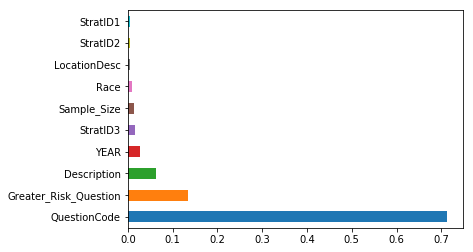

In [89]:
feat_importances = pd.Series(RForrest.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [75]:
train.dtypes

Patient_ID                    int64
YEAR                          int64
LocationDesc                  int64
Subtopic                      int64
Greater_Risk_Question         int64
Description                   int64
Sample_Size                 float64
Sex                           int64
Race                          int64
Grade                         int64
GeoLocation                  object
QuestionCode                  int64
StratID1                      int64
StratID2                      int64
StratID3                      int64
StratificationType            int64
Greater_Risk_Probability    float64
dtype: object

In [76]:
from sklearn import preprocessing

In [81]:
std_X = preprocessing.scale(X)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3, random_state=20)

In [83]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (X_train,y_train)
y_pre02 = reg.predict(X_test)

In [84]:
rms = sqrt(mean_squared_error(y_test, y_pre01))
rms

15.94841302867608